# Example 16.1: Thermal Equilibrium

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
A hot iron block with a mass of $m_{Fe}=50\ \mathrm{kg}$ and an inital temperature of $T_{Fe,1}=80^\circ\mathrm{C}$ is quenched in a water bath with an initial temperature of $T_{w,1}=25^\circ\mathrm{C}$ containing $V_w=0.5\ \mathrm{m^3}$ of water.  Show that equlibrium occurs when the temperature of the block and the water are the same.


## Solution

__[Video Explanation](https://iad.scorm.canvaslms.com/courses/sconeID/scone_prod.sha256_990c2774f250e5c4c14687b10b44ec01734d97480fea6297cbf1b7f86db1a65f/0/Ex16.mp4)__

### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.  Since the initial temperature of the iron block is below the boiling temperature for the water, we can assume no phase change occurs.  Also, since the temperature changes are relatively small, we can treat both substances as having constant specific heat

In [3]:
from kilojoule.templates.default import *
water = realfluid.Properties('Water')

# Given values
V_w = Quantity(0.5,'m^3')
T_w_1 = Quantity(25,'degC').to('K')
T_Fe_1 = Quantity(80,'degC').to('K')
m_Fe = Quantity(50,'kg')
p = Quantity(1,'atm')

# Properties (Constant specific heat)
c_p_w = Quantity(4.18,'kJ/kg/K')
c_p_Fe = Quantity(0.45,'kJ/kg/K')

Summary();

<IPython.core.display.Latex object>

""


## $1^{\mathrm{st}}$ Law
We'll begin by applying the first law to a control volume containing both the water and the iron.  There is no change in kinetic energy or potential energy for the system.  We'll also assume no heat transfer across the boundary of the control volume and the only work will be boundary work due to thermal expansion or compression of the block and water.
\begin{gather}
    U_2-U_1 + \cancel{\Delta KE} + \cancel{\Delta PE} = \cancel{Q_{1\to2}}-W_{1\to2}\\
    m_w(u_2 + p_2v_2 - u_1-p_1v_1)_w + m_{Fe}(u_2 + p_2v_2 - u_1-p_1v_1)_{Fe} = 0\\
    m_w(h_2 - h_1)_w + m_{Fe}(h_2-h_1)_{Fe} = 0\\
    m_wc_{p,w}(T_2-T_1)_w + m_{Fe}c_{p,Fe}(T_2-T_1)_{Fe} = 0
\end{gather}

### Assuming Equal Temperatures
If we assume the water and block eventually reach the same temperature, we can solve this equation for $T_2$.
\begin{gather}
    T_2 = T_{w,2} = T_{Fe,2}\\
    T_2 = \frac{m_wc_{p,w}T_{w,1}+m_{Fe}c_{p,Fe}T_{Fe,1}}{m_wc_{p,w}+m_{Fe}c_{p,Fe}}
\end{gather}

In [4]:
%%showcalc
rho_w = water.density(T_w_1,p)
m_w = V_w*rho_w
T_2 = (m_w*c_p_w*T_w_1 + m_Fe*c_p_Fe*T_Fe_1)/( m_w*c_p_w + m_Fe*c_p_Fe)

\begin{align}
  \rho_{w} &=  \mathrm{ \underset{ water }{ density } }\left( T_{w,1}, p \right)  = \mathrm{ \underset{ water }{ density } }\left( 298.15\ \mathrm{K}, 1\ \mathrm{atm} \right) = 997.05\ \frac{\mathrm{kg}}{\mathrm{m}^{3}}
\end{align}

\begin{align}
  m_{w} &=   V_{w}  \cdot  \rho_{w}  \\
    &=  0.5\ \mathrm{m}^{3}  \cdot  997.05\ \frac{\mathrm{kg}}{\mathrm{m}^{3}} \\
    &= 498.52\ \mathrm{kg}
\end{align}

\begin{align}
  T_{2} &=  \frac{   m_{w}  \cdot  c_{p,w}   \cdot  T_{w,1}  +   m_{Fe}  \cdot  c_{p,Fe}   \cdot  T_{Fe,1}  }{  m_{w}  \cdot  c_{p,w}  +  m_{Fe}  \cdot  c_{p,Fe}  } \\
    &= \frac{   498.52\ \mathrm{kg}  \cdot  4.18\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}   \cdot  298.15\ \mathrm{K}  +   50\ \mathrm{kg}  \cdot  0.45\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}   \cdot  353.15\ \mathrm{K}  }{  498.52\ \mathrm{kg}  \cdot  4.18\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}  +  50\ \mathrm{kg}  \cdot  0.45\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}  }\\
    &= 298.74\ \mathrm{K}
\end{align}



## Verifying Equilibrium
We know from experience and the Zeroth Law that the heat transfer process between the water and the block will continue until the equilibrium temperature shown above is acheived, then it will stop.  However, we can verify that this will be the final temperature by checking the entropy generation for each possible ending temperature condition that would satisfy the First and Second Law.  Since entropy can be generated but not destroyed, all process will proceed until the entropy generation is maximized.

### $2^{\mathrm{nd}}$ Law
We can apply the second law with the same assumptions of the no heat transfer and constant specific heat.
\begin{gather}
    S_2-S_1 = \sum_j\frac{\cancel{Q_j}}{T_j} + S_{gen}\\
    m_w(s_2-s_1)_w + m_{Fe}(s_2-s_1)_{Fe} = S_gen\\
    m_wc_{p,w}\ln\left(\frac{T_{w,2}}{T_{w,1}}\right) + m_{Fe}c_{p,Fe}\ln\left(\frac{T_{Fe,2}}{T_{Fe,1}}\right) = S_{gen}
\end{gather}
Here we have left the final temperatures of the water and the block as separate variables so we can check the entropy generation for different potential ending conditions.

We now have two equations (First and Second Law) with three unknowns ($T_{Fe,2}$, $T_{w,2}$, and $S_{gen}$).  The two final temperatures are linked by the First Law, so they are not truly independent.  Rather, for a given final block temperature there will only be one final water temperature that would satisfy the First Law.  We can visualize this by plotting the entropy generation for a range of possible ending block temperatures near the expected equilibrium temperature.

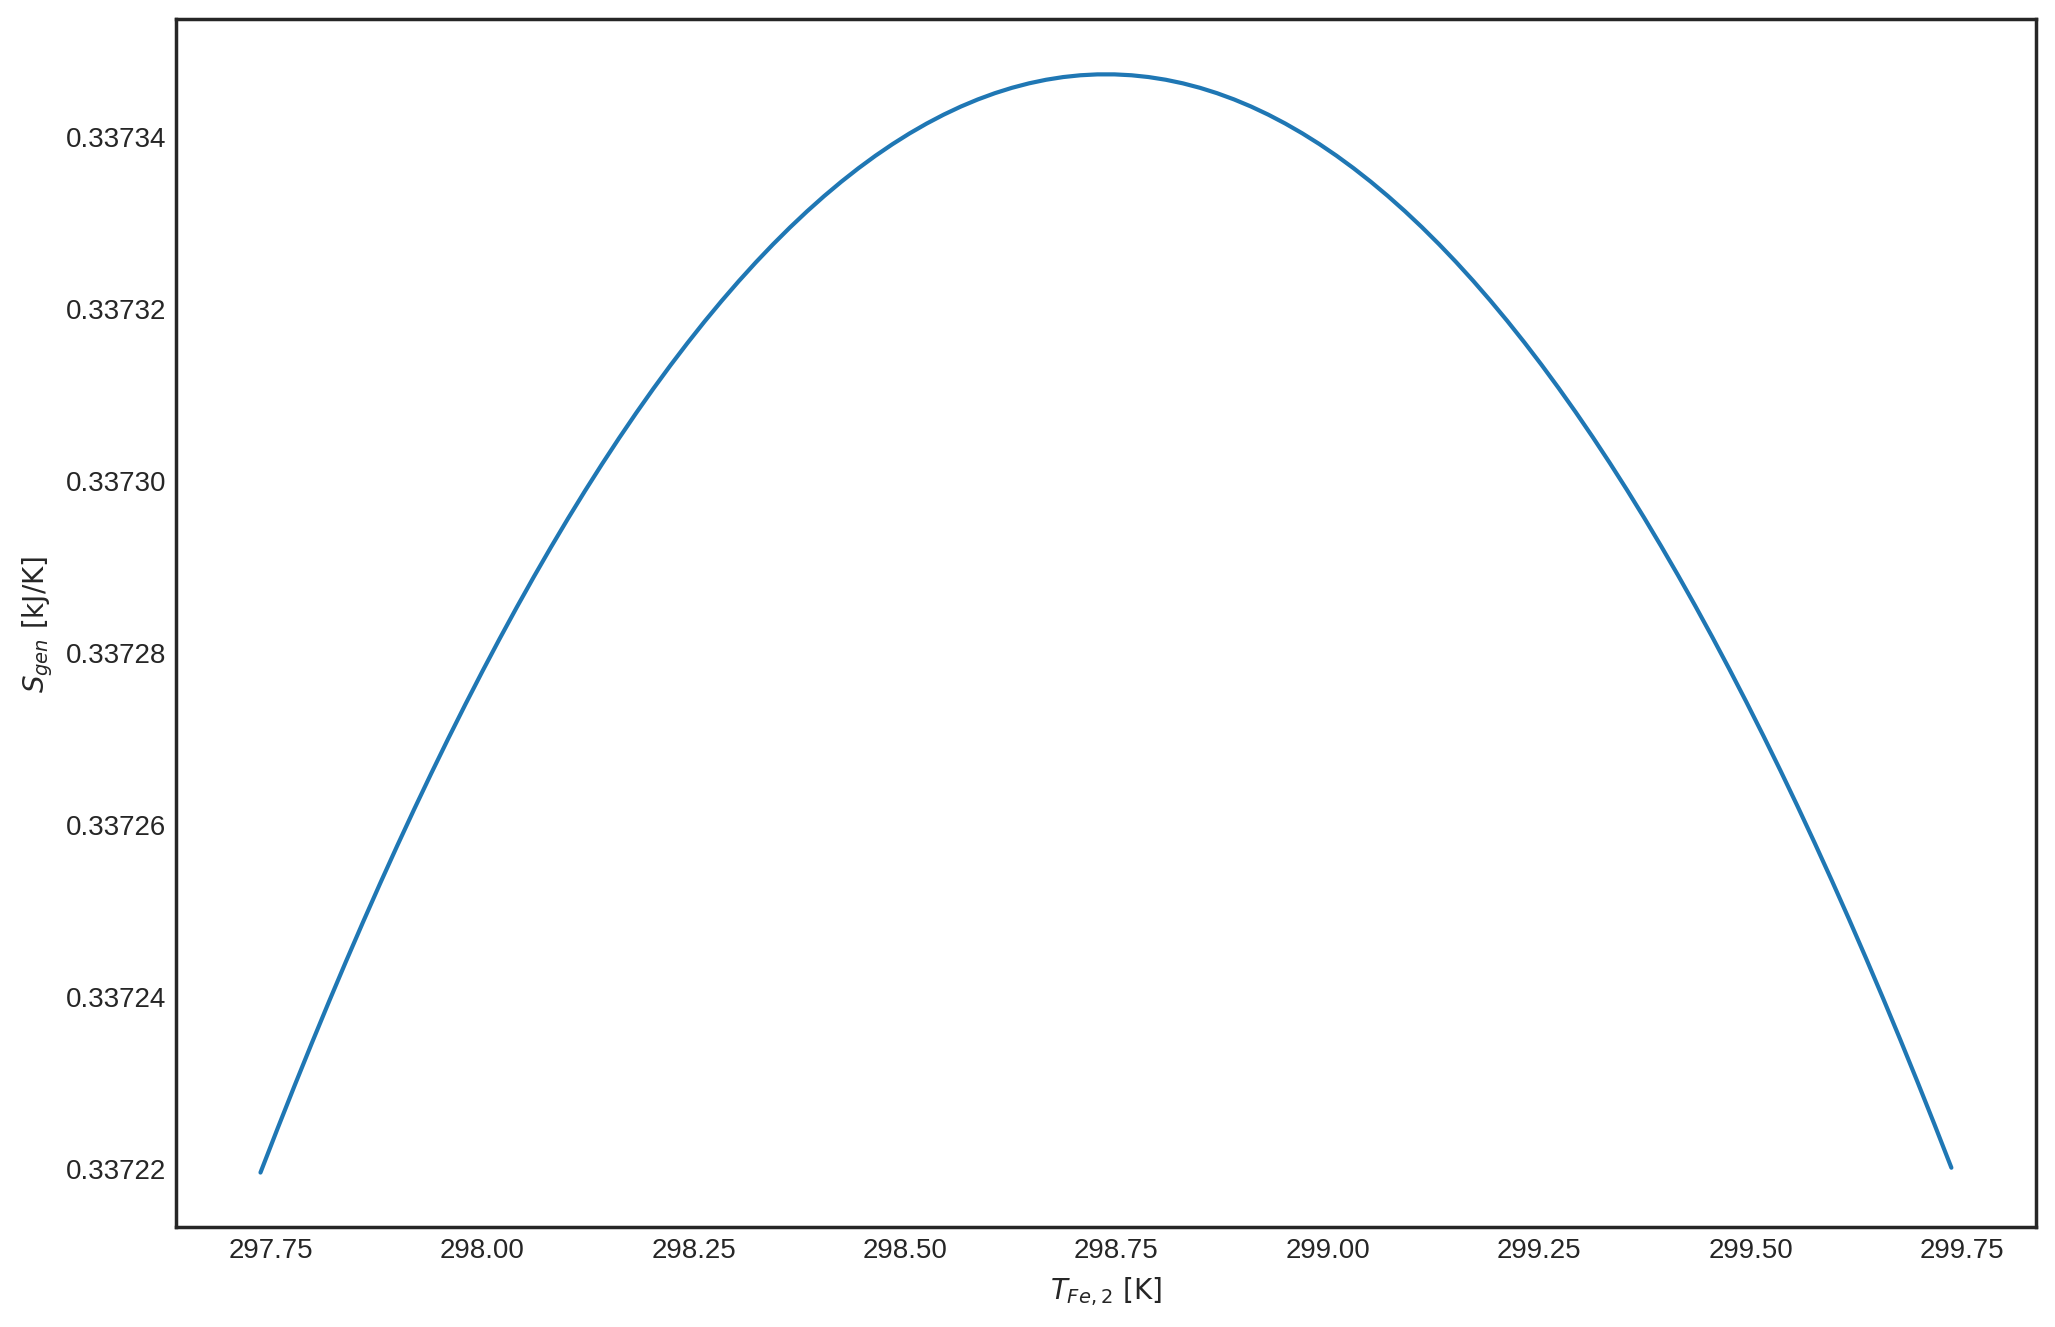

In [3]:
# Potential ending block temperatures in a range plus or minus 1 K from T_2 found above
T_range = Quantity(1,'K')
T_Fe_2_range = np.linspace(T_2-T_range,T_2+T_range,100)
# Corresponding ending water temperatures from the first law
T_w_2_range = (m_w*c_p_w*T_w_1 + m_Fe*c_p_Fe*(T_Fe_1-T_Fe_2_range))/( m_w*c_p_w )
# Entropy generation for each ending condition
S_gen_range = m_w*c_p_w*ln(T_w_2_range/T_w_1) + m_Fe*c_p_Fe*ln(T_Fe_2_range/T_Fe_1)

plt.plot(T_Fe_2_range,S_gen_range)
plt.xlabel('$T_{Fe,2}\ [\mathrm{K}]$')
plt.ylabel('$S_{gen}\ [\mathrm{kJ/K}]$');

From this we see that the entropy generation is maximized at $T_2=298.74\ \mathrm{K}$.  Once the system reaches that temperature, the process could not proceed in either direction without destoying entopy, which would violate the second law. While this outcome was intuitive for this simple case, the same analysis can be applied to more complex processes to predict the final equilibrium condition even when it is not obvious.

In [0]:
# Export your solution to submit to Canvas
# 1) Ensure all cells above show your final solution
# 2) Click the 'Save' button in the toolbar
# 3) Uncomment (remove the #) from the last line in this cell
# 4) Ensure the filename in the command below matches the filename of this notebook
# 5) Execute this cell to create an HTML file showing only the output 
# 6) Submit the .html file located in the folder with this notebook

!jupyter nbconvert --to html_embed --no-input --no-prompt "Ex16.1 Thermal Equilibrium.ipynb"